<a href="https://colab.research.google.com/github/Samy8M/Hello.streamlit/blob/main/CAPSTONE__CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The specificity of the k-Nearest Neighbors algorithm is that this formula is computed not at the moment of fitting but rather at the moment of prediction.

In [ ]:
import pandas as pd
import numpy as np
import torch.optim as optim #The neural network optimizer
from sklearn.model_selection import train_test_split #For splitting the data
from sklearn.neighbors import KNeighborsRegressor #To define the kNN model
#Inspect the kNN model
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns #For visualization
from sklearn.model_selection import GridSearchCV #For tuning and optimizing the kNN
#Decision tree libs
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

#Import pytorch libraries
import tensorflow
import torch
from torch import nn

#Import visualization libraries
import matplotlib.pyplot as plt

In [ ]:
#Upload file from local directory
#For images you can upload a zip file
from google.colab import files
uploaded = files.upload()

Saving Theses complete data.csv to Theses complete data.csv


In [ ]:
df = pd.read_csv("Theses complete data.csv")
data = df.values
df.head()

,YEAR,GDP per capita (current US$),"Electricity production from renewable sources, excluding hydroelectric (% of total)","Electricity production from renewable sources, excluding hydroelectric (kWh)",Access to electricity (% of population),Total greenhouse gas emissions (kt of CO2 equivalent),GDP (current US$),"Population, total",Current health expenditure per capita (current US$),Out-of-pocket expenditure (% of current health expenditure),"Government expenditure on education, total (% of GDP)"
0,1960,271.0,NaN,NaN,NaN,NaN,3.169472e+10,227233184,NaN,NaN,NaN
1,1961,276.0,NaN,NaN,NaN,NaN,3.293637e+10,232567007,NaN,NaN,NaN
2,1962,291.0,NaN,NaN,NaN,NaN,3.565020e+10,238121604,NaN,NaN,NaN
3,1963,323.0,NaN,NaN,NaN,NaN,4.088637e+10,243893375,NaN,NaN,NaN
4,1964,312.0,NaN,NaN,NaN,NaN,3.995716e+10,249873656,NaN,NaN,NaN


# (A) DATA WRANGLING

FIRST CLEANING BY REPLACING WITH THE MEAN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   YEAR                                                                                 62 non-null     int64  
 1   GDP per capita (current US$)                                                         62 non-null     float64
 2   Electricity production from renewable sources, excluding hydroelectric (% of total)  45 non-null     float64
 3   Electricity production from renewable sources, excluding hydroelectric (kWh)         45 non-null     float64
 4   Access to electricity (% of population)                                              28 non-null     float64
 5   Total greenhouse gas emissions (kt of CO2 equivalent)                                30 non-nu

In [ ]:
#Univariate method of replacing missing values with mean, mode e.t.c
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
imp.fit(data)

i = data[:,0:11]
imp.transform(i)[8:12]

array([[1.96800000e+03, 3.57000000e+02, 7.26936098e-01, 1.46831111e+09,
        6.34757968e+01, 1.73072034e+06, 5.14018322e+10, 2.75937546e+08,
        1.38891405e+02, 8.31219864e+01, 6.54201367e+00],
       [1.96900000e+03, 3.97000000e+02, 7.26936098e-01, 1.46831111e+09,
        6.34757968e+01, 1.73072034e+06, 5.87104288e+10, 2.83080501e+08,
        1.38891405e+02, 8.31219864e+01, 6.54201367e+00],
       [1.97000000e+03, 4.58932581e+02, 7.26936098e-01, 1.46831111e+09,
        6.34757968e+01, 1.73072034e+06, 6.83672109e+10, 2.90526233e+08,
        1.38891405e+02, 8.31219864e+01, 6.54201367e+00],
       [1.97100000e+03, 4.51694009e+02, 6.28088367e-01, 1.63000000e+08,
        6.34757968e+01, 1.73072034e+06, 7.03117339e+10, 2.98284475e+08,
        1.38891405e+02, 8.31219864e+01, 6.54201367e+00]])

DATA CLEANING BY REPLACING BY MULTIVARIATE FEATURE IMPUTATION

In [ ]:
#Multivariate imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(data)

x_prep = data[:,:]
clean = np.round(imp.transform(x_prep))

In [ ]:
print('Array:', clean[0:2])

Array: [[ 1.96000000e+03  2.71000000e+02  0.00000000e+00 -3.02765415e+08
  -1.20000000e+01  7.86291000e+05  3.16947211e+10  2.27233184e+08
   7.50000000e+01  8.60000000e+01  4.00000000e+00]
 [ 1.96100000e+03  2.76000000e+02  0.00000000e+00 -2.98763428e+08
  -1.10000000e+01  7.95211000e+05  3.29363685e+10  2.32567007e+08
   7.50000000e+01  8.60000000e+01  4.00000000e+00]]


In [ ]:
# Normalize the dataset
scaler = StandardScaler().fit(clean)
Clean = scaler.transform(clean)


In [ ]:
print(np.isnan(Clean))

[[False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False Fa

The above code shows that all missing values have been properly handled. Since True=there is a NaN and False=no NaN

(B) EXPLORATORY DATA ANALYSIS

In [ ]:
print('Datatype:', Clean.dtype)

Datatype: float64


In [ ]:
print('Array:', Clean[0:2])

Array: [[-1.70433621 -1.21480305 -0.79652144 -0.82531844 -1.30026036 -1.25715178
  -0.92597341 -1.27454155 -0.58664066  0.55028094 -0.91155715]
 [-1.64845633 -1.2102631  -0.79652144 -0.82350908 -1.27141737 -1.23854384
  -0.9239434  -1.25498162 -0.58664066  0.55028094 -0.91155715]]


In [ ]:
#View the number of elements in the dataset (rows*columns)
print(Clean.size)
#View the number of Dimensions(2 in this case)
print(Clean.ndim)


682
2


In [ ]:
# Creating a matrix using age, salry, balance as rows and columns
print(np.corrcoef(Clean.T))

[[ 1.          0.89353071  0.749634    0.80400851  0.98055028  0.97671462
   0.88890334  0.97869373  0.74804948 -0.65571509  0.79831671]
 [ 0.89353071  1.          0.7270721   0.84217969  0.90507647  0.92261154
   0.96971176  0.91481552  0.94068342 -0.71730227  0.8390958 ]
 [ 0.749634    0.7270721   1.          0.87889703  0.81130791  0.81803447
   0.8086117   0.81805131  0.73239549 -0.62473284  0.69005658]
 [ 0.80400851  0.84217969  0.87889703  1.          0.84357441  0.86402146
   0.89549452  0.86557366  0.82836579 -0.71203446  0.78847232]
 [ 0.98055028  0.90507647  0.81130791  0.84357441  1.          0.99453918
   0.93204204  0.99475437  0.80868419 -0.70158093  0.80688843]
 [ 0.97671462  0.92261154  0.81803447  0.86402146  0.99453918  1.
   0.95204067  0.99846433  0.8414963  -0.71654513  0.83327833]
 [ 0.88890334  0.96971176  0.8086117   0.89549452  0.93204204  0.95204067
   1.          0.94755537  0.95655023 -0.77634665  0.85958668]
 [ 0.97869373  0.91481552  0.81805131  0.86557366

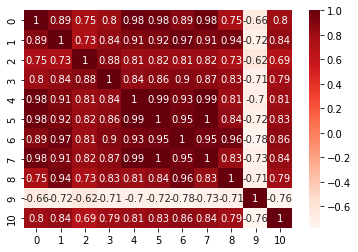

In [ ]:
sns.heatmap(np.corrcoef(Clean.T), annot=True, cmap='Reds')
plt.show()

GDP per capita (index 1) which is our target variable, is highly correlated to indexes 4,5,6,7,8 and 10 which are Access to electricity (% of population),	Total greenhouse gas emissions (kt of CO2 equivalent),	GDP (current US$), Population,

Current health expenditure (current US$), and Gov't expenditure on education respectively. It is also highly but a little less correlated with electricity from renewable sources.

# DROPPED GHG

In [ ]:
#I will drop Green House Gases because goinng back to our objective it is but obvious
#that renewable energy sources will reduce GHG emission
ibl=np.delete(Clean, 5, 1)
ibl[0:2]

array([[-1.70433621, -1.21480305, -0.79652144, -0.82531844, -1.30026036,
        -0.92597341, -1.27454155, -0.58664066,  0.55028094, -0.91155715],
       [-1.64845633, -1.2102631 , -0.79652144, -0.82350908, -1.27141737,
        -0.9239434 , -1.25498162, -0.58664066,  0.55028094, -0.91155715]])

In [ ]:
#View the number of elements in the dataset (rows*columns)
print(ibl.size)
#View the number of Dimensions(2 in this case)
print(ibl.ndim)
# Creating a matrix using age, salry, balance as rows and columns
np.corrcoef(ibl.T)

620
2


array([[ 1.        ,  0.89353071,  0.749634  ,  0.80400851,  0.98055028,
         0.88890334,  0.97869373,  0.74804948, -0.65571509,  0.79831671],
       [ 0.89353071,  1.        ,  0.7270721 ,  0.84217969,  0.90507647,
         0.96971176,  0.91481552,  0.94068342, -0.71730227,  0.8390958 ],
       [ 0.749634  ,  0.7270721 ,  1.        ,  0.87889703,  0.81130791,
         0.8086117 ,  0.81805131,  0.73239549, -0.62473284,  0.69005658],
       [ 0.80400851,  0.84217969,  0.87889703,  1.        ,  0.84357441,
         0.89549452,  0.86557366,  0.82836579, -0.71203446,  0.78847232],
       [ 0.98055028,  0.90507647,  0.81130791,  0.84357441,  1.        ,
         0.93204204,  0.99475437,  0.80868419, -0.70158093,  0.80688843],
       [ 0.88890334,  0.96971176,  0.8086117 ,  0.89549452,  0.93204204,
         1.        ,  0.94755537,  0.95655023, -0.77634665,  0.85958668],
       [ 0.97869373,  0.91481552,  0.81805131,  0.86557366,  0.99475437,
         0.94755537,  1.        ,  0.82609322

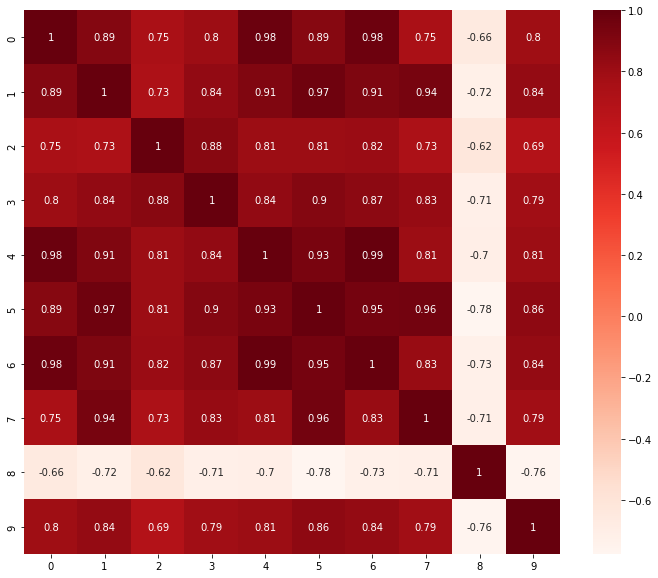

In [ ]:
sns.heatmap(np.corrcoef(ibl.T), annot=True, cmap='Reds')
plt.show()

In [ ]:
# split into input (X) and output (y) variables
X = ibl[:,2:]
y = ibl[:,1]

#Sanity check array dimensions
print(X.shape)
print(y.shape)

# Split training and test
#Default separation is 75% for train set and 25% for test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=73)


(62, 8)
(62,)


In [ ]:
#GridSearchCV is a tool that is often used for tuning hyperparameters of machine learning models
#I use it here to know which k will best suite my model
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 705, in score
    y_pred = self.predict(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 729, in kneighbors
    " but n_samples = %d, n_neighbors = %d" % (n_samples_fit, n_neighbors)
ValueError: Expe

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [ ]:
gridsearch.best_params_

{'n_neighbors': 2}

In [ ]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

0.1392648209192664

In [ ]:
test_rmse

0.15221362595570276

In [ ]:
r2_score(y_train, train_preds_grid)

0.9798365085443225

In [ ]:
r2_score(y_test, test_preds_grid)

0.9788717784068923

# (C) FEATURE ENGINEERING

In [ ]:
# split into input (X) and output (y) variables
X = Clean[:,2:]
y = Clean[:,1]

#Sanity check array dimensions
print(X.shape)
print(y.shape)

(62, 9)
(62,)


We want to find how many components I actually need.

In [ ]:
#I want the explained variance to be 99%
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
pca.fit(X)
reduced = pca.transform(X)

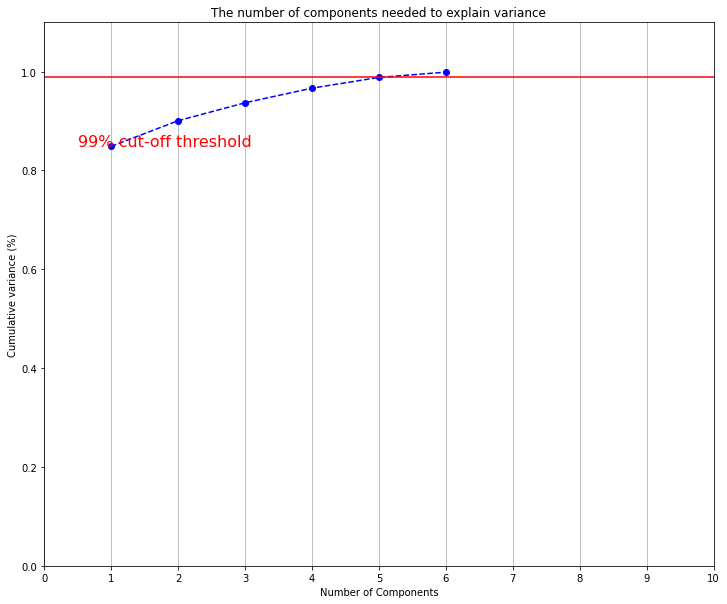

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,10)

fig, ax = plt.subplots()
xi = np.arange(1, 7, step=1) #starting at 1 component and increasing by 1 till 6
y = np.cumsum(pca.explained_variance_ratio_) #Cumulatively summing the explained_var_ratio

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
PC=pca.fit_transform(X)
principalDF=pd.DataFrame(data=PC,columns=['pc1','pc2','pc3','pc4','pc5'])
finalDf = pd.concat([principalDF, df[['GDP per capita (current US$)']]], axis = 1)
finalDf.head()

,pc1,pc2,pc3,pc4,pc5,GDP per capita (current US$)
0,-2.841274,-0.355079,0.453137,-0.368440,0.063405,271.0
1,-2.816559,-0.341952,0.432272,-0.354349,0.071418,276.0
2,-2.799648,-0.334583,0.421341,-0.348310,0.075193,291.0
3,-2.777513,-0.317116,0.401426,-0.317025,0.078363,323.0
4,-2.753571,-0.303610,0.378245,-0.300723,0.086721,312.0


In [ ]:
PCloadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components=df.columns.tolist()
components=components[2:]
loadingdf=pd.DataFrame(PCloadings,columns=('PC1','PC2','PC3','PC4','PC5'))
loadingdf["variable"]=components
loadingdf

,PC1,PC2,PC3,PC4,PC5,variable
0,0.873969,0.290019,0.361277,0.086301,-0.039054,"Electricity production from renewable sources,..."
1,0.934576,0.108863,0.247992,-0.053263,-0.064646,"Electricity production from renewable sources,..."
2,0.964156,0.150795,-0.195799,0.134698,0.068585,Access to electricity (% of population)
3,0.979121,0.123272,-0.178783,0.084127,0.044761,Total greenhouse gas emissions (kt of CO2 equi...
4,0.990773,-0.022935,-0.062937,-0.150254,0.065435,GDP (current US$)
5,0.978233,0.115024,-0.172553,0.116780,0.038023,"Population, total"
6,0.913231,-0.084715,-0.005248,-0.401200,0.095502,Current health expenditure per capita (current...
7,-0.814018,0.510294,-0.166273,-0.195260,-0.165942,Out-of-pocket expenditure (% of current health...
8,0.895972,-0.243691,-0.092731,0.004673,-0.379171,"Government expenditure on education, total (% ..."


In [ ]:
print(pca.explained_variance_ratio_)

[0.84869615 0.05188458 0.03633    0.02960684 0.02170715]


The first principal component explains 84.8% of the total variation of the dataset, the second explains 5.18%

In [ ]:
#Plot the loadings to see how high the weightings are in both PCA's
#Import necessary modelues for plotting
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff

fig=ex.scatter(x=loadingdf['PC1'],y=loadingdf['PC2'],text=loadingdf['variable'],)
fig.update_layout(
height=700,width=600,
title_text='loadings plot')
fig.update_traces(textposition='bottom center')

fig.show()

This is perfect as the compnents are exactly what our hypotheses demand. That GDP per capita have a positive relationship with electricity production from renewable sources. And as such lead to an improved social welfare for sub-saharan africans.

# (C) MODELLING

In [ ]:
#Split into input (X) and output (y) variables
X = finalDf[['pc1','pc2','pc3','pc4','pc5']]
y = finalDf['GDP per capita (current US$)']

#Print the first few rows (head)
print(X[:2])
print(y[:2])

# Split training and test
#Default separation is 75% for train set and 25% for test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=73)


        pc1       pc2       pc3       pc4       pc5
0 -2.841274 -0.355079  0.453137 -0.368440  0.063405
1 -2.816559 -0.341952  0.432272 -0.354349  0.071418
0    271.0
1    276.0
Name: GDP per capita (current US$), dtype: float64


X and y used: This is often done in machine learning code because mathematical notation generally uses a capital letter for matrices and a lowercase letter for vectors.

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
#Evaluate the model using RMSE
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

253.72845178146375

In [ ]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse
#Underfitting = when the model fits the training data less than the testing (higher training error than test)

167.48125836421602

Without PCA: Depicts underfitting. Testing with 25% of the data gave an rmse of 189. Testing with 15% gives 89.323

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, train_preds)

0.954953472260338

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, test_preds)

0.9931119770046926

The model makes crummy predictions (high RMSE), but the predictor gives us information about the actual observations (high Rsq)

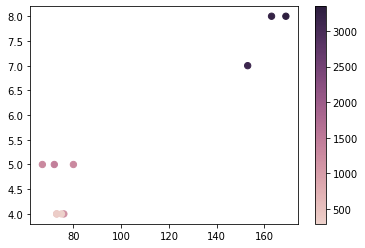

In [ ]:
#Visuaize how the predictions from the train set look
#c
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
     X_test[:,6], X_test[:,8], c=y_test, s=40, cmap=cmap
  )
f.colorbar(points)
plt.show()

# (D) TUNING AND OPTIMIZING THE kNN

WITHOUT PCA:

In [ ]:
#Split into input (X) and output (y) variables
X = Clean[:,2:]
y = Clean[:,1]

#Print the first few rows (head)
print(X[:2])
print(y[:2])

# Split training and test
#Default separation is 75% for train set and 25% for test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=73)

[[-0.79652144 -0.82531844 -1.30026036 -1.25715178 -0.92597341 -1.27454155
  -0.58664066  0.55028094 -0.91155715]
 [-0.79652144 -0.82350908 -1.27141737 -1.23854384 -0.9239434  -1.25498162
  -0.58664066  0.55028094 -0.91155715]]
[-1.21480305 -1.2102631 ]


In [ ]:
#GridSearchCV is a tool that is often used for tuning hyperparameters of machine learning models
#I use it here to know which k will best suite my model
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 705, in score
    y_pred = self.predict(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 729, in kneighbors
    " but n_samples = %d, n_neighbors = %d" % (n_samples_fit, n_neighbors)
ValueError: Expe

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [ ]:
gridsearch.best_params_

{'n_neighbors': 2}

In [ ]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse
test_rmse
r2_score(y_train, train_preds_grid)
r2_score(y_test, test_preds_grid)

0.1392648209192664

In [ ]:
test_rmse

0.17027445942526342

It means the model fits better with k=6 given that boths root-mean-square-errors have reduced.

In [ ]:
r2_score(y_train, train_preds_grid)

0.9798365085443225

In [ ]:
r2_score(y_test, test_preds_grid)

0.9735603987978713

This shows that the PCA tends to make the model overly complex in this case. Because from these results, we have a high r square and a very low rmse.

In [ ]:
#Bagging for better performance
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(
    n_neighbors=best_k, weights=best_weights
     )

In [ ]:
#Import the BaggingRegressor class from scikit-learn and create a new instance with 100 estimators using the bagged_knn model
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=6,
                                                    weights='distance'),
                 n_estimators=100)

In [ ]:
#Make a prediction and calculate the RMSE to see if it improved
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

137.22914596745557

The first kNN is still the most preferable with the lowest rmse.




---



# DECISION TREE PREDICTIONS

In [ ]:
dect1 = DecisionTreeRegressor (random_state = 5)
dect1.fit(X_train,y_train)

DecisionTreeRegressor(random_state=5)

In [ ]:
dect1_pred = dect1.predict(X_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=dect1_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff